## Reading The Data

In [251]:
import pandas as pd

In [252]:
weather = pd.read_csv('Weather_dataset.csv', index_col="DATE")

In [253]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2024-07-20,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,9.40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2024-07-21,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preparing The Data

In [255]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.671076
ACSH       0.671076
AWND       0.495694
DAPR       0.999550
FMTM       0.876738
FRGT       0.999887
MDPR       0.999550
PGTM       0.520910
PRCP       0.015985
SNOW       0.359487
SNWD       0.352507
TAVG       0.885349
TMAX       0.000619
TMIN       0.000788
TSUN       0.935217
WDF1       0.671076
WDF2       0.495638
WDF5       0.500647
WDFG       0.759836
WSF1       0.671076
WSF2       0.495582
WSF5       0.500647
WSFG       0.759836
WT01       0.776439
WT02       0.980301
WT03       0.992458
WT04       0.999775
WT05       0.998368
WT07       0.999887
WT08       0.817077
WT09       0.999887
WT16       0.889965
WT18       0.999831
dtype: float64

In [256]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [257]:
core_weather.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']

In [258]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2024-07-19,0.0,NaN,NaN,84.0,56.0
2024-07-20,0.0,NaN,NaN,73.0,59.0
2024-07-21,0.0,NaN,NaN,66.0,58.0


Filling in missing values

In [260]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.015985
snow          0.359487
snow_depth    0.352507
temp_max      0.000619
temp_min      0.000788
dtype: float64

In [261]:
core_weather['snow'].value_counts()

snow
0.0    11379
1.0        1
Name: count, dtype: int64

In [262]:
core_weather['snow_depth'].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

So in all of the historical data from 1960 there was only one day where it snowed.

In [264]:
core_weather = core_weather.drop(columns=['snow', 'snow_depth'])

In [265]:
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2024-07-19,0.0,84.0,56.0
2024-07-20,0.0,73.0,59.0
2024-07-21,0.0,66.0,58.0


In [266]:
core_weather[pd.isnull(core_weather['precip'])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-08,NaN,67.0,56.0
2017-10-28,NaN,68.0,50.0
2023-03-29,NaN,52.0,43.0


In [267]:
core_weather.loc["1983-10-20":"1983-11-05",:]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [268]:
# checking the most occuring value
core_weather['precip'].value_counts()

precip
0.00    14429
0.01      445
0.02      205
0.03      126
0.05      105
        ...  
3.58        1
1.92        1
1.77        1
5.01        1
1.28        1
Name: count, Length: 179, dtype: int64

In [269]:
#replacing missing percepitation values with Zero
core_weather['precip'] = core_weather['precip'].fillna(0)

In [270]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.000000
temp_max    0.000619
temp_min    0.000788
dtype: float64

In [271]:
core_weather[pd.isnull(core_weather['temp_max'])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [272]:
core_weather = core_weather.fillna(method='ffill')

C:\Users\minam\AppData\Local\Temp\ipykernel_22644\1266411444.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method='ffill')


In [273]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

## Checking data types

In [275]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [276]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-07-14', '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
       '2024-07-19', '2024-07-20', '2024-07-21', '2024-07-22', '2024-07-23'],
      dtype='object', name='DATE', length=17767)

In [277]:
core_weather.index = pd.to_datetime(core_weather.index)

In [278]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-07-14', '2024-07-15', '2024-07-16', '2024-07-17',
               '2024-07-18', '2024-07-19', '2024-07-20', '2024-07-21',
               '2024-07-22', '2024-07-23'],
              dtype='datetime64[ns]', name='DATE', length=17767, freq=None)

In [279]:
core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=17767)

## Analyzing Weather Data

<Axes: xlabel='DATE'>

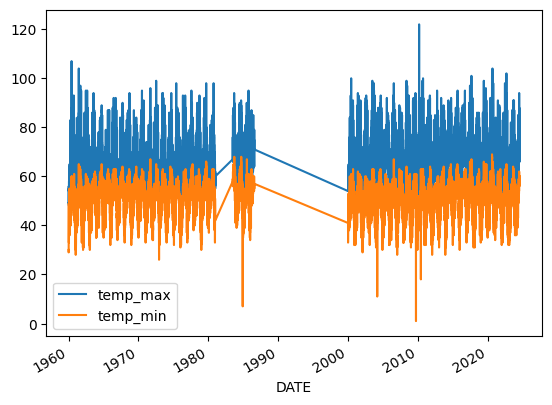

In [281]:
core_weather[["temp_max", "temp_min"]].plot()

In [282]:
core_weather.index.year.value_counts().sort_index()

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    205
Name: count, dtype: int64

<Axes: xlabel='DATE'>

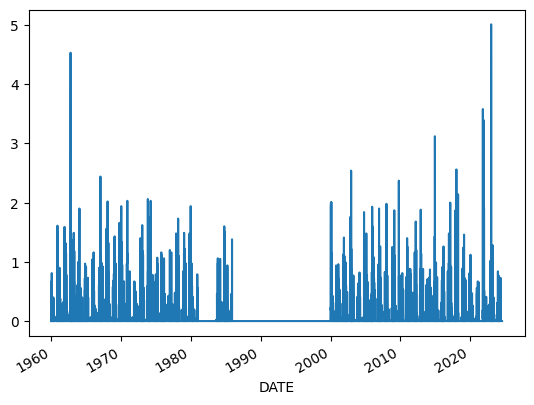

In [283]:
core_weather["precip"].plot()

In [284]:
core_weather.groupby(core_weather.index.year).sum()["precip"].sort_values(ascending=False)

DATE
1973    29.37
2005    27.37
1969    25.70
1970    25.31
1967    23.98
1979    23.79
2017    23.34
2012    22.93
2001    22.84
2006    22.79
2010    22.67
1978    22.57
1962    22.47
2000    21.09
2023    20.98
2021    20.82
2019    20.00
2016    19.77
2014    19.62
2002    19.12
1963    19.11
1975    17.54
1968    17.19
1974    16.87
1964    16.83
2018    16.82
1965    16.32
1972    16.27
2011    16.06
1984    16.03
2022    15.38
2009    14.57
1960    14.01
1961    13.87
2008    13.86
1980    13.58
1966    13.11
2004    12.97
2007    12.79
2024    12.35
1977    11.70
2003    11.37
1971    10.61
1976     8.64
2015     8.58
1985     8.50
1983     7.13
2020     6.42
2013     4.89
1986     0.00
Name: precip, dtype: float64

## Training ML Model

In [286]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [287]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2024-07-19,0.0,84.0,56.0,73.0
2024-07-20,0.0,73.0,59.0,66.0
2024-07-21,0.0,66.0,58.0,77.0


In [288]:
core_weather = core_weather.iloc[:-1, :].copy()

In [289]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2024-07-18,0.0,75.0,59.0,84.0
2024-07-19,0.0,84.0,56.0,73.0
2024-07-20,0.0,73.0,59.0,66.0


In [365]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

reg = Ridge(alpha=0.1)

In [367]:
predictors = ["precip", "temp_max", "temp_min"]

In [369]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2021-12-31"]
    test = core_weather.loc["2022-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_absolute_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [371]:
error, combined = create_predictions(predictors, core_weather, reg)

In [373]:
error

np.float64(3.24749537046264)

In [375]:
combined

,actual,predictions
DATE,,
2022-01-01,55.0,52.429907
2022-01-02,54.0,54.779453
2022-01-03,57.0,55.563236
2022-01-04,57.0,59.403671
2022-01-05,55.0,59.443056
...,...,...
2024-07-18,84.0,74.041585
2024-07-19,73.0,79.998993
2024-07-20,66.0,72.598441


<Axes: xlabel='DATE'>

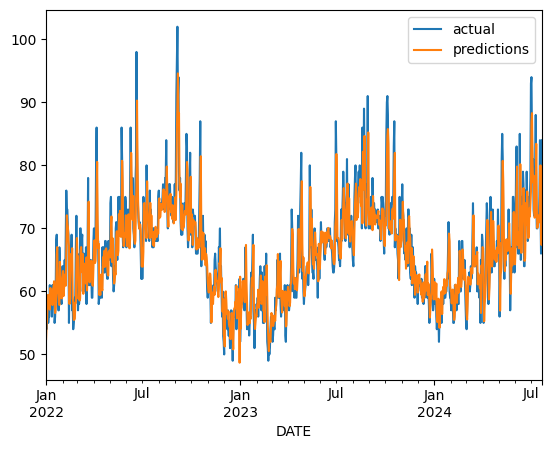

In [377]:
combined.plot()

In [379]:
reg.coef_

array([-2.18298752,  0.72157225,  0.17891434])

## Rolling Mean